In [1]:
import sys
sys.path.append('..')

In [2]:
import os
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from DomainPrediction.utils import helper
from DomainPrediction.utils.constants import *
from DomainPrediction.protein.base import BaseProtein

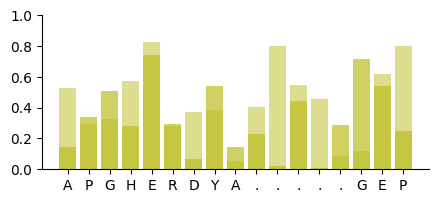

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(5,2))

amino_acids = list("APGHERDYA.....GEP")
ax.bar(list(range(len(amino_acids))), np.random.rand(len(amino_acids))/1.2, color='tab:olive', alpha=0.7)
ax.bar(list(range(len(amino_acids))), np.random.rand(len(amino_acids))/1.2, color='tab:olive', alpha=0.5)
ax.set_xticks(list(range(len(amino_acids))), amino_acids)
ax.set_ylim(top=1.0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()

In [30]:
len(amino_acids)

16

### Combine fasta ESM3

In [4]:
gxps_protein = BaseProtein(file='/nethome/kgeorge/workspace/DomainPrediction/Data/gxps/gxps_ATC_AF.pdb')

In [5]:
gxps_protein.get_residues(A_gxps_atc)

'VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIALGVAPDQRVAICVTRSLARIIGLLAVLKAGGAYVPLDPAYPGERLAYMLTDATPVILMADNVGRAALSEDILATLTVLDPNTLLEQPDHNPQVSGLTPQHLAYVIYTSGSTGRPKGVMIEHRSVVNLTLTQITQFDVCATSRMLQFASFGFDASVWEIMMALSCGAMLVIPTETVRQDPQRLWRYLEEQAITHACLTPAMFHDGTDLPAIAIKPTLIFAGEAPSPALFQALCSRADLFNAYGPTEITVCATTWDCPADYTGGVIPIGSPVANKRLYLLDEHRQPVPLGTVGELYIGGVGVARGYLNRPELTAERFLNDPFSDETNARMYRAGDLARYLPDGNLVFVGRNDQQVKIRGFRIEPGEIEARLVEHSEVSEALVLALGDGQDKRLVAYVVALADDGLATKLREHLSDILPDYMIPAAFVRLDAFPLTPNGKLDRRSLP'

In [15]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/round_3_exp'
esm3_gen_fastas = ['esm3_str_2000.fasta', 'esm3_str_3000.fasta']

In [16]:
esm_seq = {}
i = 0
for _file in esm3_gen_fastas:
    file_path = os.path.join(data_path, _file)
    sequences = helper.read_fasta(file_path)

    for rec in sequences:
        _gen_protein = BaseProtein(sequence=str(rec.seq), id=rec.id)
        assert len(gxps_protein.sequence) == len(_gen_protein.sequence)
        assert gxps_protein.get_residues(A_gxps_atc) == _gen_protein.get_residues(A_gxps_atc)
        assert gxps_protein.get_residues(C_gxps_atc) == _gen_protein.get_residues(C_gxps_atc)
        assert gxps_protein.get_residues(T_gxps_atc) != _gen_protein.get_residues(T_gxps_atc)

        id = f'gxps_ATC_esm3_str_gen_{i}'
        esm_seq[id] = str(rec.seq)
        i += 1

In [17]:
assert len(esm_seq) == 5000

In [19]:
helper.create_fasta(sequences=esm_seq, 
                    file=os.path.join(data_path, 'esm3_str_5000.fasta'))

### Create a Combined DataFrame

In [4]:
data_path = '/nethome/kgeorge/workspace/DomainPrediction/Data/round_3_exp'
gen_fastas = ['esm3_str_5000.fasta', 'evodiff_5000.fasta']

In [5]:
gxps_protein = BaseProtein(file='/nethome/kgeorge/workspace/DomainPrediction/Data/gxps/gxps_ATC_AF.pdb')

In [6]:
gxps_base_seq = ''.join([gxps_protein.sequence[i] for i in range(len(gxps_protein.sequence)) if i not in A_gxps_atc+C_gxps_atc])

In [9]:
assert len(gxps_base_seq) == 115
gxps_base_seq

'APGEDAFARQAYQAPQGEIEIALATIWRELLNVEQVGRHDSFFALGGHSLLAVRMIERLRRIGLGLSVQTLFQHPTLSVLAQSLVPHREISVPDNGITADTTVLTPAMLPLIDLT'

In [10]:
gen_dict = []
for _file in gen_fastas:
    file_path = os.path.join(data_path, _file)
    sequences = helper.read_fasta(file_path)

    for rec in sequences:
        masked_seq = ''.join([str(rec.seq)[i] for i in range(len(str(rec.seq))) if i not in A_gxps_atc+C_gxps_atc])
        assert len(masked_seq) == 115
        gen_dict.append({
            'name': rec.id, 
            'sequence': str(rec.seq),
            'masked_sequence': masked_seq,
            'n_mut': helper.hamming_distance(gxps_base_seq, masked_seq)
            })

In [11]:
assert len(gen_dict) == 10000

In [13]:
df = pd.DataFrame(gen_dict)

In [14]:
df.head()

,name,sequence,masked_sequence,n_mut
0,gxps_ATC_esm3_str_gen_0,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSAADYPKEPYVAPEGEAEQLLAQIWMELLGVERVGRHDNFFALG...,49
1,gxps_ATC_esm3_str_gen_1,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSDTDYPRTPYIAPEGAVEETLAAIWQDLLQVERVGRHDSFFALG...,47
2,gxps_ATC_esm3_str_gen_2,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,EPQASDYPAVPYEAPEGEQEQLLAGIWQELLGVERVGRHDNFFALG...,46
3,gxps_ATC_esm3_str_gen_3,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APAEDSFDRAPYVAPEGEVEQTLAGIWQELLQVERVGRHDSFFELG...,49
4,gxps_ATC_esm3_str_gen_4,VCVHQLFEQQIEKTPDAIAVIYENQTLSYAELNARANRLAHQLIAL...,APSEDDYPKPPYVAPEGEVEQLLAKIWQELLGVEKVGRHDSFFALG...,43


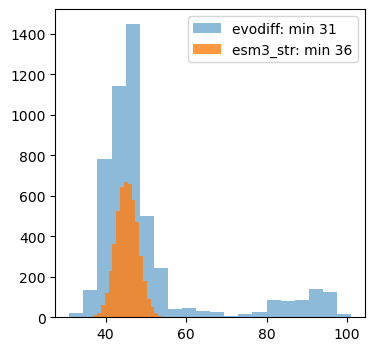

In [21]:
plt.figure(figsize=(4, 4))
plt.hist(df.loc[df['name'].str.contains('evodiff'), 'n_mut'], bins=20, alpha=0.5, label=f"evodiff: min {df.loc[df['name'].str.contains('evodiff'), 'n_mut'].min()}")
plt.hist(df.loc[df['name'].str.contains('esm3_str'), 'n_mut'], bins=20, alpha=0.8, label=f"esm3_str: min {df.loc[df['name'].str.contains('esm3_str'), 'n_mut'].min()}")
plt.legend()
plt.show()

In [ ]:
df.to_csv(os.path.join(data_path, 'gen_seq.csv'), index=False)